In [1]:
from vectors import *
from teapot import load_triangles
from draw_model import draw_model
from math import *
from transforms import *
from random import randint
from vector_drawing import *
from draw3d import *
from matrices import *

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
B=(
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)
v=(3,-2,5)

In [3]:
list(zip(*B))

[(0, 0, 1), (2, 1, 0), (1, 0, -1)]

In [4]:
def multiply_matrix_vector(matrix,vector):
    return linear_combination(vector,*zip(*matrix))

In [5]:
multiply_matrix_vector(B,v)

(1, -2, -2)

In [6]:
def matrix_multiply(a,b):
    return tuple(
        tuple(dot(row,col) for col in zip(*b))
        for row in a
    )

In [7]:
a=((1,1,0),(1,0,1),(1,-1,1))
b=((0,2,1),(0,1,0),(1,0,-1))
matrix_multiply(a,b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [8]:
c=((1,2),(3,4))
d=((0,-1),(1,0))
matrix_multiply(c,d)

((2, -1), (4, -3))

In [9]:
def get_rotation_matrix(t):
    seconds=t/1000
    return(
        (cos(seconds),0,-sin(seconds)),
        (0,1,0),
        (sin(seconds),0,cos(seconds)),
    )
# draw_model(load_triangles(),get_matrix=get_rotation_matrix)

In [10]:
def get_rotation_matrix_x(t):
    seconds=t/1000
    return((1,0,0),
        (0,cos(seconds),sin(seconds)),
        (0,-sin(seconds),cos(seconds)))
def get_rotation_matrix_y(t):
    seconds=t/1000
    return((cos(seconds),0,-sin(seconds)),
        (0,1,0),
        (sin(seconds),0,cos(seconds)))
def get_rotation_matrix_z(t):
    seconds=t/1000
    return((cos(seconds),sin(seconds),0),
        (-sin(seconds),cos(seconds),0),
        (0,1,0))

In [11]:
def infer_matrix(n,transformation):
    def standard_basic_vector(i):
        return tuple(1 if i==j else 0 for j in range(1,n+1))
    standard_basic=[standard_basic_vector(i) for i in range(1,n+1)]
    cols=[transformation(v) for v in standard_basic]
    return tuple(zip(*cols))

In [12]:
infer_matrix(3,rotate_z_by(pi/2))

((6.123233995736766e-17, -1.0, 0.0),
 (1.0, 1.2246467991473532e-16, 0.0),
 (0, 0, 1))

In [13]:
def random_matrix(rows,cols,min=-2,max=2):
    return tuple(
        tuple(
            randint(min,max) for j in range(0,cols)
        )for i in range(0,rows)
    )

In [14]:
random_matrix(3,3,0,10)

((8, 6, 9), (7, 4, 2), (4, 7, 9))

In [15]:
def transform(v):
    m=((2,1,1),(1,2,1),(1,1,2))
    return multiply_matrix_vector(m,v)
# draw_model(polygon_map(transform,load_triangles()))

In [16]:
def multiply_matrix_vector(martix,vector):
    return tuple(
        sum(vector_entry*matrix_entry for vector_entry,matrix_entry in zip(row,vector))
        for row in martix
    )

In [17]:
def multiply_matrix_vector(martix,vector):
    return tuple(
        dot(row,vector)
        for row in martix
    )

In [18]:
a=((1,1,0),(1,0,1),(1,-1,1))
b=((0,2,1),(0,1,0),(1,0,-1))

def transform_a(v):
    return multiply_matrix_vector(a,v)

def transform_b(v):
    return multiply_matrix_vector(b,v)

compose_a_b=compose(transform_a,transform_b)

In [19]:
infer_matrix(3,compose_a_b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [20]:
matrix_multiply(a,b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [21]:
a=((0,1),(-1,0))
b=((0,-1),(1,0))
matrix_multiply(a,b)

((1, 0), (0, 1))

In [22]:
a=((0,1),(-1,0))
b=((0,-1),(1,0))
matrix_multiply(a,b)

((1, 0), (0, 1))

In [23]:
def matrix_power(power,matrix):
    result=matrix
    for _ in range(1,power):
        result=matrix_multiply(result,matrix)
    return result

In [24]:
a=((-1,0,-1,-2,-2),(0,0,2,-2,1),(-2,-1,-2,0,1),(0,2,-2,-1,0),(1,1,-1,-1,0))
b=((-1,0,-1,-2,-2),(0,0,2,-2,1),(-2,-1,-2,0,1),(0,2,-2,-1,0),(1,1,-1,-1,0))
matrix_multiply(a,b)

((1, -5, 9, 6, 1),
 (-3, -5, -1, 1, 2),
 (7, 3, 3, 5, 1),
 (4, 0, 10, -3, 0),
 (1, -1, 5, -3, -2))

In [25]:
c=((-1,-1,0),(-2,1,2),(1,0,-1))
d=((1,),(1,),(1,))
matrix_multiply(c,d)

((-2,), (1,), (0,))

In [26]:
multiply_matrix_vector(c,(1,1,1))

(-2, 1, 0)

In [27]:
dot((1,-2,0),(-1,2,2))

-5

In [28]:
a=((1,-2,0),(-1,-2,2))
b=((2,0,-1,2),(0,-2,2,-2),(-1,-1,2,1))
matrix_multiply(a,b)

((2, 4, -5, 6), (-4, 2, 1, 4))

In [29]:
dot((1,1),(1,1,1))

2

In [30]:
# 返回无意义结果
# a=((1,-2,0),(-1,-2,2))
# b=((2,0,-1,2),(0,-2,2,-2),(-1,-1,2,1))
# matrix_multiply(b,a)

In [31]:
def transpose(matrix):
    return tuple(zip(*matrix))

In [32]:
transpose(((1,),(2,),(3,)))

((1, 2, 3),)

In [33]:
transpose(((1, 2, 3),))

((1,), (2,), (3,))

In [34]:
def project_xy(v):
    x,y,z=v
    return (x,y)

In [35]:
infer_matrix(3,project_xy)

((1, 0, 0), (0, 1, 0))

In [36]:
def project_xymn(v):
    x,y,z,m,n=v
    return (x,y,m,n)

In [37]:
infer_matrix(5,project_xymn)

((1, 0, 0, 0, 0), (0, 1, 0, 0, 0), (0, 0, 0, 1, 0), (0, 0, 0, 0, 1))

In [38]:
multiply_matrix_vector(infer_matrix(5,project_xymn),(1,2,3,4,5))

(1, 2, 4, 5)

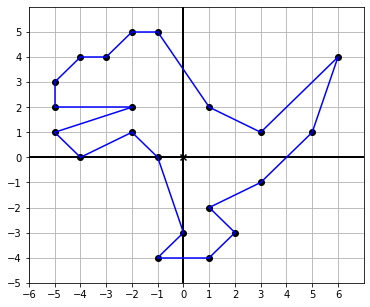

In [39]:
dino_vectors=[(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)]

def polygon_segments_2d(points,color='blue'):
    count=len(points)
    return [Segment(points[i],points[(i+1)%count],color=color)for i in range(0,count)]

draw(
    Points(*dino_vectors),
    *polygon_segments_2d(dino_vectors)
)

In [40]:
def polygon_segments_3d(points,color='blue'):
    count=len(points)
    return [Segment3D(points[i],points[(i+1)%count],color=color)for i in range(0,count)]

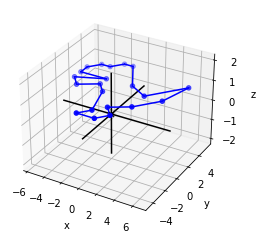

In [41]:
dino_3d=[(x,y,1) for x,y in dino_vectors]
draw3d(
    Points3D(*dino_3d,color='blue'),
    *polygon_segments_3d(dino_3d)
)

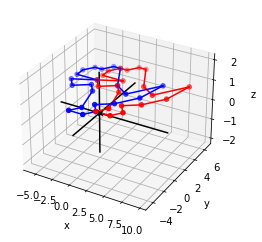

In [42]:
magic_martix=(
    (1,0,3),
    (0,1,1),
    (0,0,1)
)

translate_3d=[multiply_matrix_vector(magic_martix,v) for v in dino_3d]

draw3d(
    Points3D(*translate_3d,color='red'),
    *polygon_segments_3d(translate_3d,color='red'),
    
    Points3D(*dino_3d,color='blue'),
    *polygon_segments_3d(dino_3d)
)

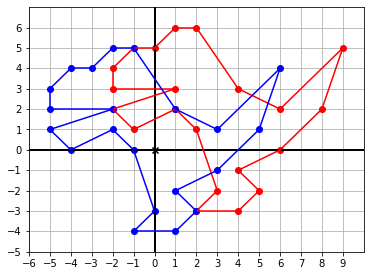

In [43]:
def polygon_segments_2d(points,color='blue'):
    count=len(points)
    return [Segment(points[i],points[(i+1)%count],color=color)for i in range(0,count)]

delete_z_martix=(
    (1,0,0),
    (0,1,0)
)

translate=[multiply_matrix_vector(delete_z_martix,v) for v in translate_3d]

draw(
    Points(*translate,color='red'),
    *polygon_segments_2d(translate,color='red'),
    
    Points(*dino_vectors,color='blue'),
    *polygon_segments_2d(dino_vectors)
)

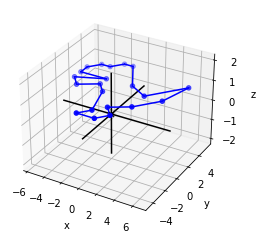

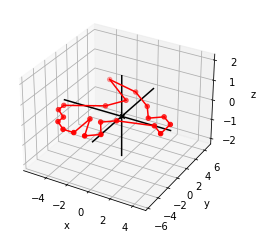

In [44]:
rorate_and_translate=((0,-1,2),(1,0,1),(0,0,1))
rotated_translated_dino=[
    multiply_matrix_vector(rorate_and_translate,v)
    for v in dino_vectors
]
draw3d(    
    Points3D(*dino_3d,color='blue'),
    *polygon_segments_3d(dino_3d)
)
draw3d(
    Points3D(*rotated_translated_dino,color='red'),
    *polygon_segments_3d(rotated_translated_dino,color='red')
)


In [45]:
def translate_3d(translation):
    def new_function(target):
        a,b,c=translation
        x,y,z=target
        matrix=((1,0,0,a),
               (0,1,0,b),
               (0,0,1,c),
               (0,0,0,1))
        vector=(x,y,z,1)
        x_out,y_out,z_out,_=multiply_matrix_vector(matrix,vector)
        return (x_out,y_out,z_out)
    return new_function

# draw_model(polygon_map(translate_3d((2,2,-3)),load_triangles()))

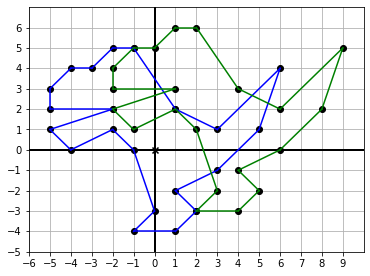

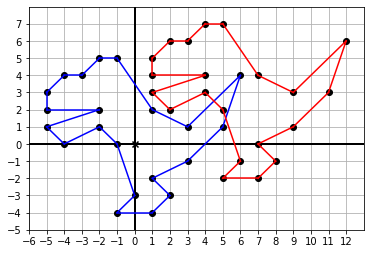

In [46]:
def polygon_segments_3d_to_2d(translation,points,color='blue',flag=True):
    a,b,z=translation
    points=[(x,y,z) for x,y in points]
    magic_martix=(
        (1,0,a),
        (0,1,b),
        (0,0,z)
    )
    points=[multiply_matrix_vector(magic_martix,v) for v in points]
    points=[(x,y) for x,y,_ in points]
    if flag:
        count=len(points)
        return [Segment(points[i],points[(i+1)%count],color=color)for i in range(0,count)]
    else:
        return points

draw(
    Points(*dino_vectors),
    *polygon_segments_2d(dino_vectors),
    Points(*polygon_segments_3d_to_2d((3,1,1),dino_vectors,color='green',flag=False)),
    *polygon_segments_3d_to_2d((3,1,1),dino_vectors,color='green')
)

draw(
    Points(*dino_vectors),
    *polygon_segments_2d(dino_vectors),
    Points(*polygon_segments_3d_to_2d((3,1,2),dino_vectors,color='red',flag=False)),
    *polygon_segments_3d_to_2d((3,1,2),dino_vectors,color='red')
)

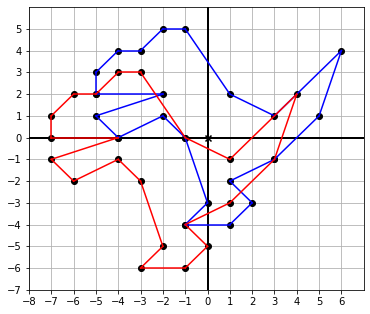

In [47]:
draw(
    Points(*dino_vectors),
    *polygon_segments_2d(dino_vectors),
    Points(*polygon_segments_3d_to_2d((-2,-2,1),dino_vectors,color='red',flag=False)),
    *polygon_segments_3d_to_2d((-2,-2,1),dino_vectors,color='red')
)

In [48]:
rotate_45_degree=curry2(rotate2d)(pi/4)
rotation_matrix=infer_matrix(2,rotate_45_degree)
rotation_matrix

((0.7071067811865476, -0.7071067811865475),
 (0.7071067811865476, 0.7071067811865476))

In [49]:
scale_matrix=((0.5,0),(0,0.5))
rotate_and_scale=matrix_multiply(rotation_matrix,scale_matrix)
# rotate_and_scale=matrix_multiply(scale_matrix,rotation_matrix)
rotate_and_scale

((0.3535533905932738, -0.35355339059327373),
 (0.3535533905932738, 0.3535533905932738))

In [50]:
((a,b),(c,d))=rotate_and_scale
final_matrix=((a,b,2),(c,d,2),(0,0,1))
final_matrix

((0.3535533905932738, -0.35355339059327373, 2),
 (0.3535533905932738, 0.3535533905932738, 2),
 (0, 0, 1))

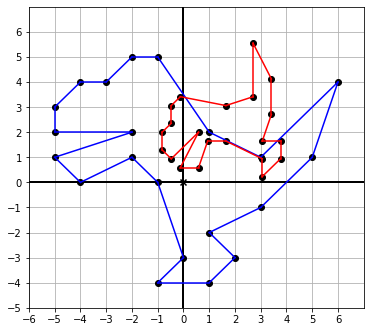

In [51]:
def polygon_segments_3d_to_2d(translation,points,color='blue',flag=True):
    z=translation[2][2]
    points=[(x,y,z) for x,y in points]
    magic_martix=translation
    points=[multiply_matrix_vector(magic_martix,v) for v in points]
    points=[(x,y) for x,y,_ in points]
    if flag:
        count=len(points)
        return [Segment(points[i],points[(i+1)%count],color=color)for i in range(0,count)]
    else:
        return points

draw(
    Points(*dino_vectors),
    *polygon_segments_2d(dino_vectors),
    Points(*polygon_segments_3d_to_2d(final_matrix,dino_vectors,color='red',flag=False)),
    *polygon_segments_3d_to_2d(final_matrix,dino_vectors,color='red'),
    save_as='figures/experiment_5_29.svg'
)

In [63]:
test1=add((2,2),scale(0.5,rotate2d(pi/4,(-2,2))))

In [64]:
test2=polygon_segments_3d_to_2d(final_matrix,dino_vectors,color='red',flag=False)[dino_vectors.index((-2,2))]

In [79]:
num=0
for i in range(len(dino_vectors)):
    for x,y in zip(add((2,2),scale(0.5,rotate2d(pi/4,dino_vectors[i]))),polygon_segments_3d_to_2d(final_matrix,dino_vectors,color='red',flag=False)[dino_vectors.index(dino_vectors[i])]):
        if isclose(x,y):
            num=num+1
        else:
            print('不通过')
print(num/2)
len(dino_vectors)

21.0


In [67]:
rotate_90_degree=curry2(rotate2d)(pi/2)
rotate_90_degree=infer_matrix(2,rotate_90_degree)
def rotate_3d(rotate_matrix):
    ((a,b),(c,d))=rotate_matrix
    return ((a,b,0),(c,d,0),(0,0,1))
rotate_90_degree=rotate_3d(rotate_90_degree)
rotate_90_degree

((6.123233995736766e-17, -1.0, 0), (1.0, 1.2246467991473532e-16, 0), (0, 0, 1))

In [55]:
translation_matrix=((1,0,3),(0,1,1),(0,0,1))
translation_rotate_matrix=matrix_multiply(rotate_90_degree,translation_matrix)

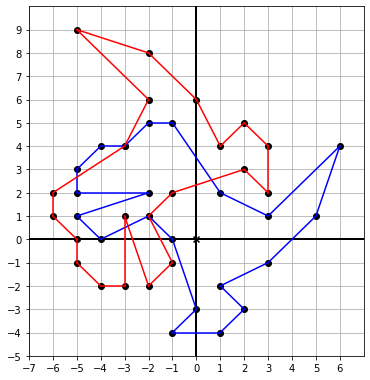

In [56]:
draw(
    Points(*dino_vectors),
    *polygon_segments_2d(dino_vectors),
    Points(*polygon_segments_3d_to_2d(translation_rotate_matrix,dino_vectors,color='red',flag=False)),
    *polygon_segments_3d_to_2d(translation_rotate_matrix,dino_vectors,color='red'),
)

In [57]:
rotate2d(pi/2,add((3,1),(-2,2)))

(-3.0, 1.0000000000000002)

In [58]:
polygon_segments_3d_to_2d(translation_rotate_matrix,dino_vectors,color='red',flag=False)[dino_vectors.index((-2,2))]

(-3.0, 1.0000000000000002)

In [59]:
def translate_4d(translation):
    def new_function(target):
        a,b,c,d=translation
        x,y,z,w=target
        matrix=((1,0,0,0,a),
               (0,1,0,0,b),
               (0,0,1,0,c),
               (0,0,0,1,d),
               (0,0,0,0,1))
        vector=(x,y,z,w,1)
        x_out,y_out,z_out,w_out,_=multiply_matrix_vector(matrix,vector)
        return (x_out,y_out,z_out,w_out)
    return new_function

translate_4d((1,2,3,4))((10,20,30,40))

(11, 22, 33, 44)